#  Indirect dark matter detection detection constatints in the SDFDM

We expect here degenerate masses so we must be carefull about the DM particles that is registered by micrOMEGAS:

We need to edit prtcls1.mld to have the righ order with Nv0 appearing first

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
import os, sys, inspect
import commands
from hep import *
import pdg_series

## Feynrules implementation
[Preliminary Analysis](../../../../../2016/micromegas_feynrules/correr_micrOMEGAs-markov.ipynb)

See also full results with user galcen in fisica? or gfif?


## Benchmark point

We choose a benchmark point with the following features
* Large $\langle\sigma v\rangle$
* Right relic density

In [3]:
#1. CHOOSE A BENCHMARK POINT  
#if 1==1:
#    MDF = 110.;MN = 101.;tanb = 10.0;lam = 0.15;v=246.2196; 
def run_feynrules_SDFDM(MDF = 110.,MN = 101.,lu = 0.1,ld = 0.1,v=246.2196,path='../micromegas/SDFDM/main'):
    o={}
    #2. File to run micrOMEGAS installed in galcen
    
    #lu=lam*np.sin(np.arctan(tanb))
    #ld=lam*np.cos(np.arctan(tanb))
    
    M=np.matrix([[ MN,                -ld*v/np.sqrt(2.),  lu*v/np.sqrt(2.)],
             [ -ld*v/np.sqrt(2.),  0.,                MDF ],
             [ lu*v/np.sqrt(2.),  MDF,               0. ]])

    (Mchi,N)=np.linalg.eig(M)
    
    pd.Series({'MDF':MDF,'MN':MN,'ld':ld,'lu':lu,\
               'N11':N[0,0],'N12':N[0,1],'N13':N[0,2],\
               'N21':N[1,0],'N22':N[1,1],'N23':N[1,2],\
               'N31':N[2,0],'N32':N[2,1],'N33':N[2,2]}).to_csv('mo.dat',sep='\t')

    #3. Run micromegas
    mo=commands.getoutput('%s mo.dat' %path)

    #4. Extrac some of the output (Dependence of the micrOMEGAs vertion)
    o['Full']=mo
    o['Mchi']=Mchi
    o['N']=N
    o['Omega']=eval(mo.split('Omega=')[1].split('\n')[0])
    o['proton_SI']=eval(mo.split('proton  SI')[1].split('[')[0])
    o['proton_SD']=eval(mo.split('proton  SI')[1].split('SD')[1].split('[')[0])
    #o['neutron_SI']=eval(mo.split('proton  SI')[1].split('[')[0])
    #o['neutron_SD']=eval(mo.split('proton  SI')[1].split('SD')[1].split('[')[0])
    o['sigmav']=eval(mo.split('annihilation cross section')[1].split('cm^3/s\n')[0])
    return o

In [40]:
%%bash
cd ../micromegas/SDFDM
make main=main.c > /dev/null


## Check one point

In [4]:
a=hep(MODEL='SimplifiedDMSDFDM')

`a-object` is an object with many attributes and methods. Use the tab to explore them. Some of them are
* a.Series: [pandas](http://pandas.pydata.org/) Series object with the "relevant" variables 
* a.LHA: Input LesHouces file as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runSPheno() -> a.LHA_out: return LHA output files as [pyslha](https://pypi.python.org/pypi/pyslha/) object
* a.runmicromegas() -> a.runSPheno() -> Updated the `a-object`  with micrOMEGAS "relevant" output

In [79]:
v=a.vev
#lambda_1=0.13
mdf=-200; MN=40; tanb=100.;lam=0.35
lu=lam*np.sin(np.arctan(tanb))
ld=lam*np.cos(np.arctan(tanb))
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %mdf
a.LHA.blocks['MINPAR'][3]='%0.8E       # MnINPUT' %MN
a.LHA.blocks['MINPAR'][4]='%0.8E       # lamuINPUT' %lu
a.LHA.blocks['MINPAR'][5]='%0.8E       # lamdINPUT' %ld
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron, MChi =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI,\
    a.LHA_out.blocks['MASS'][a.pdg.pdg_name.Chi_1]
#manual pdgs:
a.pdg['Frep']=-210000601
mof=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MnINPUT,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
#implement sigma_v
mo=a.micromegas_output(mof['Full'])
a.branchings(a.LHA_out.decays,min_pdg=25)
print 'Omega h^2, SI proton, sigmav,Br_inv  =',mo.Omega_h2,mo.proton.SI,mo.sigmav,a.Br_names['h0 ->  Chi_1 Chi_1']
print a.Br_names['Fre ->  Chi_1 W-'],a.Br_names['Chi_2 ->  Chi_1 Z0']

Omega h^2, SI proton, neutron, MChi = 0.101 2.082e-10 2.135e-10 36.84391
Omega h^2, SI proton, sigmav,Br_inv  = 0.104 2.993e-10 7.1e-29 0.153803127
1.0 0.845128787


List of constraints for DM=37 GeV and MD=200 GeV
* $\sigma(\chi_{2,3}^0,\chi^\pm)\operatorname{Br}$

In [53]:

#mo=run_feynrules_SDFDM(MDF = eval(a.LHA.blocks['MINPAR'][2]),MN = eval(a.LHA.blocks['MINPAR'][3]),\
#                        lu = eval(a.LHA.blocks['MINPAR'][4]),ld = eval(a.LHA.blocks['MINPAR'][5]),v=a.vev)



0.334 2.027e-10 8.08e-29


[4, 6, 13, 15, 1, 3, 5, 23, 24, 25, 1014, 1016, 210000601, 2, 11, 1012]

In [73]:
a.Br_names

Fre ->  Chi_1 W-             1.000000e+00
Chi_3 ->  Frep D UBAR        1.414900e-06
Chi_3 ->  Fre TAU+ NUT       4.404919e-07
Chi_3 ->  Fre SBAR C         1.365783e-06
Chi_3 ->  Frep S CBAR        1.365783e-06
Chi_3 ->  Frep MU- ANUM      4.715199e-07
Chi_3 ->  Fre E+ NUE         4.716334e-07
Chi_3 ->  Fre DBAR U         1.414900e-06
Chi_3 ->  Chi_2 TAU+ TAU-    2.306475e-11
Chi_3 ->  Chi_2 UBAR U       7.506597e-10
Chi_3 ->  Chi_2 SBAR S       9.593106e-10
Chi_3 ->  Chi_2 DBAR D       9.634054e-10
Chi_3 ->  Chi_2 ANUT NUT     4.302990e-10
Chi_3 ->  Chi_1 Z0           5.539797e-01
Chi_3 ->  Fre MU+ NUM        4.715199e-07
Chi_3 ->  Frep TAU- ANUT     4.404919e-07
Chi_3 ->  Chi_2 CBAR C       3.349277e-10
Chi_3 ->  Chi_1 h0           4.460119e-01
Chi_3 ->  Chi_2 ANUM NUM     4.302990e-10
Chi_3 ->  Chi_2 MU+ MU-      2.168401e-10
Chi_3 ->  Frep E- ANUE       4.716334e-07
Chi_3 ->  Chi_2 ANUE NUE     4.302990e-10
Chi_3 ->  Chi_2 E+ E-        2.175491e-10
Chi_2 ->  Chi_1 Z0           8.340

In [12]:
a.Br_names['Fre ->  Chi_1 W-']

0.99984755599999997

## Scan

In [14]:
print mof['Full']


Dark matter candidate is '~chi2' with spin=1/2 mass=1.62E+01

=== MASSES OF HIGGS AND ODD PARTICLES: ===
Higgs masses and widths
      H   125.00 8.79E-03

Masses of odd sector Particles:
~chi : Mchi2 =    16.2 || ~X1n : MDF   =   500.0 || ~chi : Mchi1 =   744.8 
~chi : Mchi3 =   752.6 || ~sk  : Msk   =  3000.0 || 

==== Calculation of relic density =====
Xf=2.24e+01 Omega=1.12e-01
# Channels which contribute to 1/(omega) more than 1%.
# Relative contributions in % are displayed
   23% ~chi2 ~chi2 ->b b~ 
   14% ~chi2 ~chi2 ->s s~ 
   14% ~chi2 ~chi2 ->d d~ 
   11% ~chi2 ~chi2 ->c c~ 
   11% ~chi2 ~chi2 ->u u~ 
    6% ~chi2 ~chi2 ->ve ve~ 
    6% ~chi2 ~chi2 ->vm vm~ 
    6% ~chi2 ~chi2 ->vt vt~ 
    4% ~chi2 ~chi2 ->ta- ta+ 
    3% ~chi2 ~chi2 ->mu- mu+ 
    3% ~chi2 ~chi2 ->e- e+ 
omega_h^2 = 1.12E-01

==== Indirect detection =======
    Channel          vcs[cm^3/s]
 annihilation cross section 2.77E-27 cm^3/s
 contribution of processes
  ~chi2,~chi2 -> b b~   8.88E-01
  ~chi2,~chi2 

In [11]:
if 1==1:
#def pdgf():
    import pandas as pd
    import pdg as pdgtmp
    #pdg=pd.Series()
    pdg_id=pdgtmp.pdgid_names
    pdg_name=pd.Series( dict((v,k) for k,v in pdgtmp.pdgid_names.iteritems()) )
    def pdg_add(id)

In [15]:
#Design:
pdg_name.A0 -> 34
pdg_id[36] -> 'A0'
pdg_add(8)='T' -> update:  pdg.name.T ; pdg.id[36]

36

In [2]:
self.pdg
























































class hep(model):
class hep(model):


















































































pdg.pdgid_names[210000601]='Fre'

NameError: name 'pdg' is not defined

In [31]:
pdg.

{-9900042: 'Higgs_minus_minus_R',
 -9900041: 'Higgs_minus_minus_L',
 -2000015: 's_tau_plus_2',
 -2000013: 's_mu_plus_R',
 -2000011: 's_e_plus_R',
 -2000006: 's_tbar_2',
 -2000005: 's_bbar_2',
 -2000004: 's_cbar_R',
 -2000003: 's_sbar_R',
 -2000002: 's_ubar_R',
 -2000001: 's_dbar_R',
 -1000037: 's_chi_minus_2',
 -1000024: 's_chi_minus_1',
 -1000016: 's_anti_nu_tau_L',
 -1000015: 's_tau_plus_1',
 -1000014: 's_anti_nu_mu_L',
 -1000013: 's_mu_plus_L',
 -1000012: 's_anti_nu_e_L',
 -1000011: 's_e_plus_L',
 -1000006: 's_tbar_1',
 -1000005: 's_bbar_1',
 -1000004: 's_cbar_L',
 -1000003: 's_sbar_L',
 -1000002: 's_ubar_L',
 -1000001: 's_dbar_L',
 -40213: 'rho_3S_minus',
 -30213: 'rho_2S_minus',
 -20543: 'B_prime_c1_minus',
 -20533: 'anti_B_prime_s10',
 -20523: 'B_prime_1_minus',
 -20513: 'anti_B_prime_10',
 -20433: 'D_prime_s1_minus',
 -20423: 'anti_D_prime_10',
 -20413: 'D_prime_1_minus',
 -20323: 'K_prime_1_minus',
 -20313: 'anti_K_prime_10',
 -20213: 'a_1_minus',
 -20211: 'pi_2S_minus',
 -1054

In [15]:
a.LHA_out.blocks['MASS']

MASS { 25 :  126; 23 :  91.2; 24 :  80.3; 1 :  0.005; 3 :  0.095; 5 :  4.18; 2 :  0.0025; 4 :  1.27; 6 :  174; 11 :  0.000511; 13 :  0.106; 15 :  1.78; 210000601 :  500; 1012 :  16.2; 1014 : -745; 1016 :  753 }

In [16]:
cat SPheno.spc.SimplifiedDMSDFDM

# SUSY Les Houches Accord 2 - SimplifiedDM/SDFDM Spectrum + Decays + Flavor Observables
# SPheno module generated by SARAH
# ----------------------------------------------------------------------
# SPheno v3.3.8  
#   W. Porod, Comput. Phys. Commun. 153 (2003) 275-315, hep-ph/0301101
#   W. Porod, F.Staub, Comput.Phys.Commun.183 (2012) 2458-2469, arXiv:1104.1573
# SARAH: 4.8.5   
#   F. Staub; arXiv:0806.0538 (online manual)
#   F. Staub; Comput. Phys. Commun. 181 (2010) 1077-1086; arXiv:0909.2863
#   F. Staub; Comput. Phys. Commun. 182 (2011)  808-833; arXiv:1002.0840
#   F. Staub; Comput. Phys. Commun. 184 (2013)  1792-1809; arXiv:1207.0906
#   F. Staub; Comput. Phys. Commun. 185 (2014)  1773-1790; arXiv:1309.7223 
# Including the calculation of flavor observables based on the FlavorKit 
#   W. Porod, F. Staub, A. Vicente; Eur.Phys.J. C74 (2014) 8, 2992; arXiv:1405.1434 
# Two-loop masss corrections to Higgs fields based on 
#   M. D. Goodsell, K. Nickel, F. Staub; arXiv:1411.0675 
#

In [64]:
print re.search('^[0-9\.eE\-\+]*$','a')

None


In [159]:
idc='0'
br=re.search('[0-9]\.[0-9eE\-\+]+',idc)
if br:
    br=br.group(0)
    if re.search(fltchk,br):
        print br

In [156]:
kk

In [127]:
micromegas

ID                     2.770000e-27
ID:~chi,~chi > b b~    8.880000e-01
ID:~chi,~chi > c c~    6.750000e-02
ID:~chi,~chi > ta t    4.390000e-02
ID:~chi,~chi > s s~    4.380000e-04
ID:~chi,~chi > mu m    1.580000e-04
dtype: float64

In [136]:
df=pd.DataFrame()
df=df.append(micromegas,ignore_index=True)

In [138]:
df.append({'ID':3,'ID:aa':4},ignore_index=True).fillna(0)

,ID,"ID:~chi,~chi > b b~","ID:~chi,~chi > c c~","ID:~chi,~chi > mu m","ID:~chi,~chi > s s~","ID:~chi,~chi > ta t",ID:aa
0,2.770000e-27,0.888,0.0675,0.000158,0.000438,0.0439,0
1,3.000000e+00,0.000,0.0000,0.000000,0.000000,0.0000,4


In [134]:
df

,ID,"ID:~chi,~chi > b b~","ID:~chi,~chi > c c~","ID:~chi,~chi > mu m","ID:~chi,~chi > s s~","ID:~chi,~chi > ta t"
0,2.770000e-27,0.888,0.0675,0.000158,0.000438,0.0439


In [94]:
cc=re.finditer('[0-9\.eE\-\+]+',c)
[g.group(0) for g in cc]

In [104]:
c

'  ~chi2,~chi2 -> mu- m  1.58E-04'

In [115]:
re.sub('\s+$','',re.sub('^\s+','',re.sub('[0-9\.eE\-\+]+','',c)))

'~chi,~chi > mu m'

'1.58E-04'

## Scan $m_{DM}$
### Higgsilino-like

In [9]:
df=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %MDM  # -> Fill a.Series.MDF
    a.runmicromegas(Direct_Detection=True)
    mo=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MnINPUT,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
    mo=a.micromegas_output(mo['Full'])
    a.Series['Omega_h2_official']=mo.Omega_h2
    a.Series['proton_SI_official']=mo.proton.SI
    a.Series['neutron_SI_official']=mo.neutron.SI
    df=df.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


### Relic density

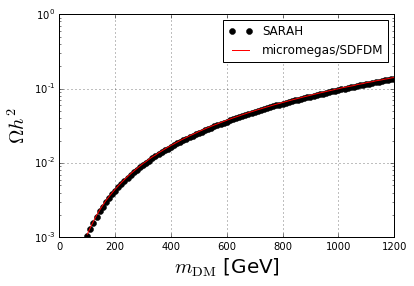

In [10]:
plt.semilogy(df.MDF,df.Omega_h2,'ko',label='SARAH')
plt.semilogy(df.MDF,df.Omega_h2_official,'r-',label='micromegas/SDFDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')


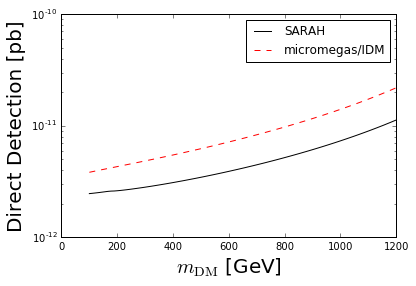

In [11]:
plt.semilogy(df.MDF,df.proton_SI,'k-',label='SARAH')
plt.semilogy(df.MDF,df.proton_SI_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

### Singlet-like

In [12]:
dn=pd.DataFrame()
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %1200  # -> Fill a.Series.MDF


dm_masses=np.linspace(100,1200,100)
for MDM in dm_masses:
    if np.where(dm_masses==MDM)[0][0]%10==0: #find the index of the array entry
        print np.where(dm_masses==MDM)[0][0]
    a.LHA.blocks['MINPAR'][3]='%0.8E       #MN' %MDM  # -> Fill a.Series.MN
    a.runmicromegas(Direct_Detection=True)
    mo=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MN,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
    mo=a.micromegas_output(mo['Full'])
    a.Series['Omega_h2_official']=mo.Omega_h2
    a.Series['proton_SI_official']=mo.proton.SI
    a.Series['neutron_SI_official']=mo.neutron.SI
    dn=dn.append(a.Series,ignore_index=True)

0
10
20
30
40
50
60
70
80
90


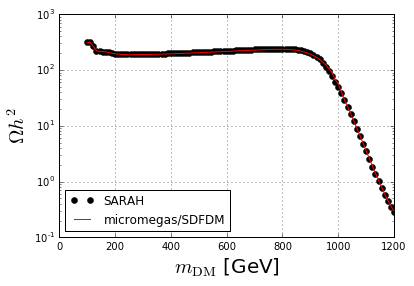

In [13]:
plt.semilogy(dn.MN,dn.Omega_h2,'ko',label='SARAH')
plt.semilogy(dn.MN,dn.Omega_h2_official,'r-',label='micromegas/SDFDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'$\Omega h^2$',size=20)
plt.grid()
plt.legend(loc='best')
plt.savefig('omega.pdf')

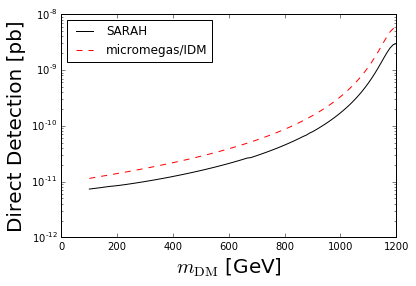

In [14]:
plt.semilogy(dn.MN,dn.proton_SI,'k-',label='SARAH')
plt.semilogy(dn.MN,dn.proton_SI_official,'r--',label='micromegas/IDM')
plt.xlabel(r'$m_{\rm DM}$ [GeV]',size=20)
plt.ylabel(r'Direct Detection [pb]' ,size=20)
plt.legend(loc='best')
plt.savefig('dd.pdf')

## Pure higssino limit

In [15]:
v=a.vev
#lambda_1=0.13
mdf=100
mn=2000
lambdau=1E-4
lambdad=1E-4
devnull=commands.getoutput('rm -f SPheno.spc.%s' %a.MODEL)
a.LHA.blocks['SPHENOINPUT'].entries[55]='0               # Calculate one loop masses'
a.LHA.blocks['MINPAR'][2]='%0.8E       #MDF' %mdf
a.LHA.blocks['MINPAR'][3]='%0.8E       #MN' %mn
a.LHA.blocks['MINPAR'][4]='%0.8E       # lamuINPUT' %lambdau
a.LHA.blocks['MINPAR'][5]='%0.8E       # lamdINPUT' %lambdad
moc=a.runmicromegas(Direct_Detection=True)
print 'Omega h^2, SI proton, neutron =',a.Series.Omega_h2,a.Series.proton_SI,a.Series.neutron_SI

Omega h^2, SI proton, neutron = 0.00103 2.47e-24 2.536e-24


In [16]:
a.LHA.blocks['MINPAR'].entries

_dict([(1, '1.3000000E-01  # lambda1INPUT'),
       (2, '1.00000000E+02       #MDF'),
       (3, '2.00000000E+03       #MN'),
       (4, '1.00000000E-04       # lamuINPUT'),
       (5, '1.00000000E-04       # lamdINPUT')])

In [17]:
mo=run_feynrules_SDFDM(MDF = -a.Series.MDF,MN = a.Series.MN,\
                        lu = a.Series.lamuINPUT,ld = a.Series.lamdINPUT ,v=a.vev)
#implement sigma_v
mo=a.micromegas_output(mo['Full'])
print mo.Omega_h2,mo.proton.SI

0.00107 3.835e-24


KeyError: 200012

[Jupyter home](./draft.pdf)